In [17]:
import numpy as np
from collections import Counter
from matplotlib import pyplot as plt

In [5]:
def verify(lines):
    for i, line in enumerate(lines):
        y, x = line.split(",")
        x = x.strip()
        y = int(y)

        op_toks = ["MIN", "MAX", "MED", "SM"]
        arg_toks = [str(i) for i in range(10)]

        stack = []
        for tok in x.split(" "):
            if tok in op_toks:
                stack.append(tok)
            elif tok in arg_toks:
                stack.append(int(tok))
            if tok == "]":
                args = []
                op = None
                while True:
                    tok = stack.pop()
                    if type(tok) == int:
                        args.append(tok)
                    else:
                        op = tok
                        break
                assert op in op_toks
                if op == "MIN":
                    stack.append(min(*args))
                elif op == "MAX":
                    stack.append(max(*args))
                elif op == "MED":
                    stack.append(int(np.median(args)))
                else:
                    stack.append(sum(args) % 10)
        assert len(stack) == 1 and stack[0] == y, (i, y, x)

In [10]:
train_lines = open("train_preprocessed.txt").readlines()
verify(train_lines)
test_lines = open("test_preprocessed.txt").readlines()
verify(test_lines)

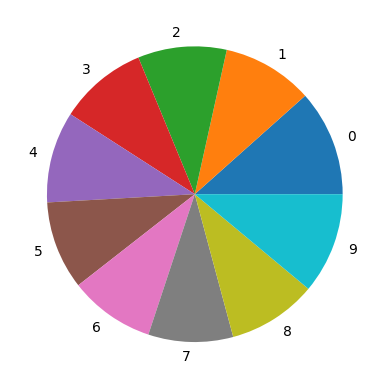

In [72]:
ys = []
for line in train_lines:
    y, x = line.split(",")
    x = x.strip()
    y = int(y)
    ys.append(y)

counter = dict(Counter(ys))
counter = {i: counter[i] for i in range(10)}
plt.pie(counter.values(), labels=counter.keys())
plt.show()

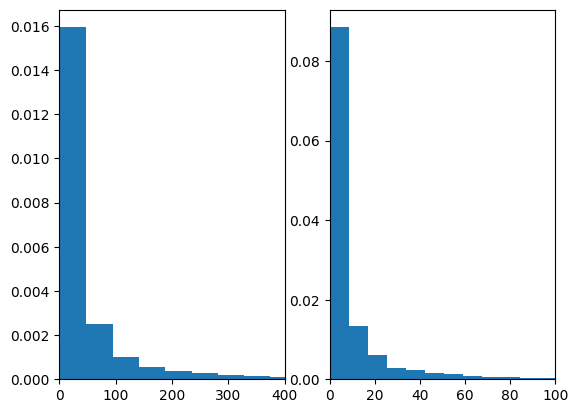

In [73]:
op_toks = ["MIN", "MAX", "MED", "SM"]
token_counts = []
op_counts = []
for i, line in enumerate(train_lines):
    y, x = line.split(",")
    x = x.strip()
    tokens = x.split(" ")
    token_count = len(tokens)
    token_counts.append(token_count)
    op_count = len([t for t in tokens if t in op_toks])
    op_counts.append(op_count)

ax = plt.subplot(1, 2, 1)
ax.hist(token_counts, bins=30, density=True)
ax.set_xlim(0, 400)

ax = plt.subplot(1, 2, 2)
ax.hist(op_counts, bins=30, density=True)
ax.set_xlim(0, 100)

plt.show()